# 1. ReAct

ReAct is a design pattern used in AI Agents that stands for Reasoning + Acting. It allows a language model (LLM) to interleave internal reasoning (Thought) with external actions (like tool use) in a structred, multi-step process.

- Instead of generating an answerin one go, the model thinks steb-by-step, deciding what it needs to do next and optionally calling tools (APIs, calculators, web-search, etc.) to help it.

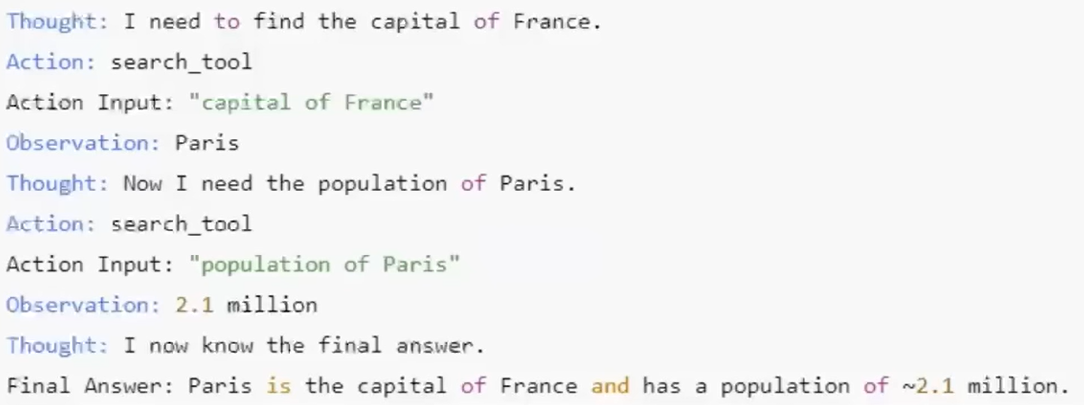

### ReAct is useful for:
-
    - Multi-step Problems
    - Tool-augmented tasks (web search, database lookup, etc)
    - Making the agent's reasoning **transparent and auditable**

### It was First Introduced in the paper:
- "ReAct: Synergizing Reasoning and Acting in Language Models" (2022)

# 2. Agent & Agent Executor

- `AgentExecutor` orchestrates the **entire loop**:  
    1. Sends inputs and previous messages to the agent.  
    2. Gets the next `action` from agent  
    3. Executes that tool with provided input  
    4. Adds the tool's `observation` back into the history  
    5. Loops again with updated history until the ageny says `Final Answer`.  

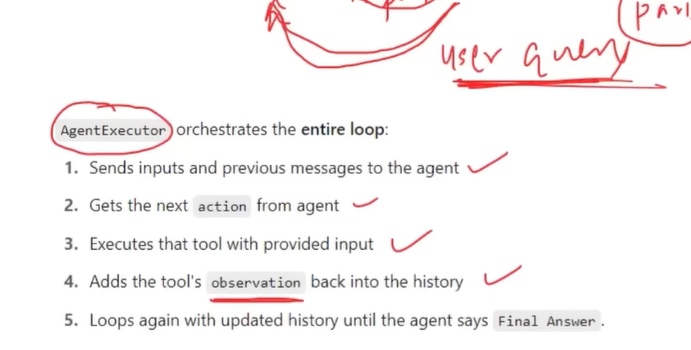

- Creating an Agent

```bash
agent = create_react_agent(
    llm=llm,
    tools=tools,  # given the list of tools
    prompt=prompt,
)
```

- Creating Agent Executor
``` bash
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,  # given the list of tools
    prompt=prompt,    
)
```

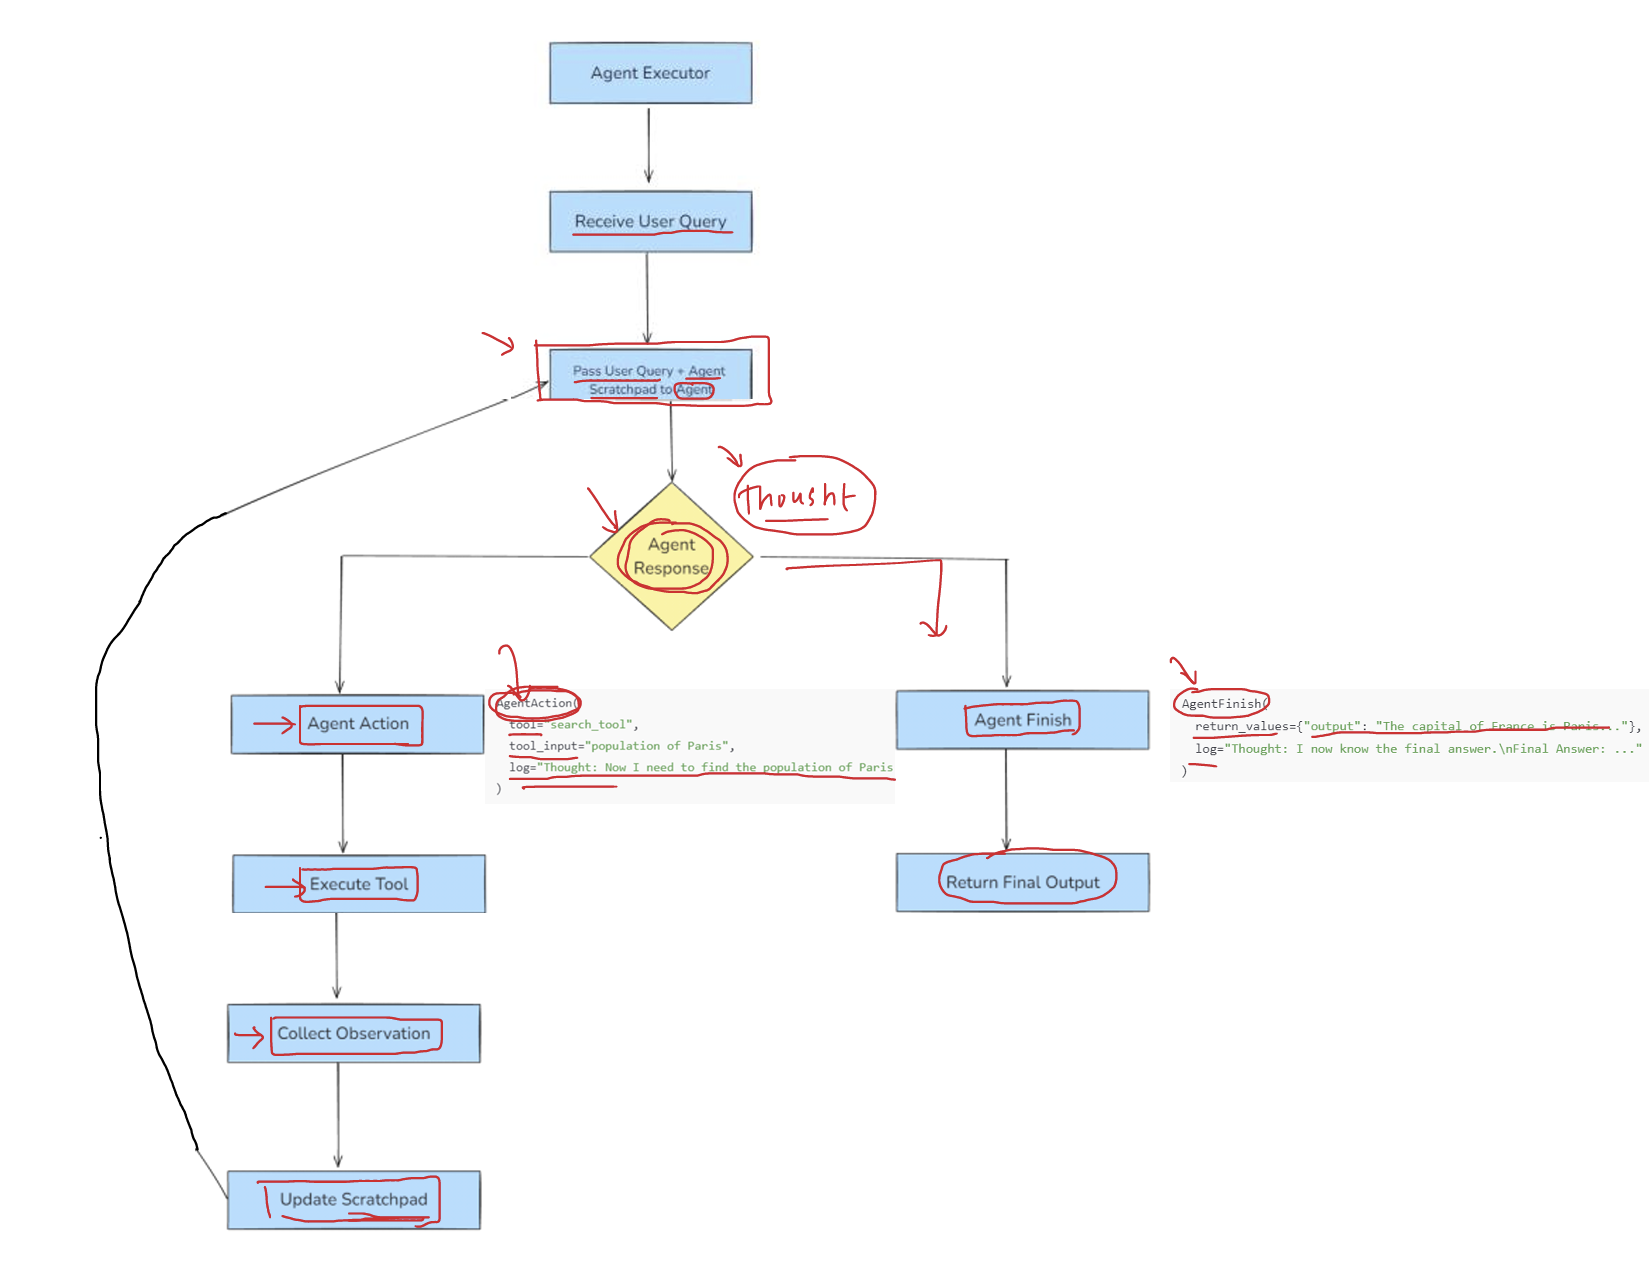

---

# using Single Built-in Tool

In [7]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
import requests

from langchain_community.tools import DuckDuckGoSearchRun

import os
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [5]:
OPENAI_KEY = os.getenv("OPEN_AI_KEY")

In [8]:
search_tool = DuckDuckGoSearchRun()

In [12]:
llm = ChatOpenAI(
    api_key=OPENAI_KEY,
    model="gpt-3.5-turbo",
    base_url="https://openrouter.ai/api/v1",
    verbose=True,
)

In [10]:
results = search_tool.invoke("Top News in India Today")

In [11]:
results

'News Headlines Today : Hindustan Times offers the most reliable news in politics, sports, entertainment and business, featuring National and International news Breaking News on Hindustan Times Get the latest updates and breaking news from India , including politics, elections, government, business, technology, and Bollywood. Reuters.com is your online source for the latest India news stories and current events, ensuring our readers up to date with any breaking news developments Stay informed with the latest news today . Get breaking news , live updates, and top headlines from India and around the world on News24 Latest News | Find detailed coverage on Latest News at IndianExpress.com.'

In [28]:
from langchain_classic.agents import create_react_agent, AgentExecutor
from langchain_classic import hub


In [29]:
# pull the ReAct prompt from LangChain Hub
prompt = hub.pull("hwchase17/react")  # Pulls the standard ReAct agent prompt

In [30]:
prompt

PromptTemplate(input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'}, template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}')

In [31]:
# Create the ReAct agent manually with the pulled prompt
agent = create_react_agent(
    llm=llm,
    tools=[search_tool],
    prompt=prompt
)

In [33]:
# Wrap it with AgentExecutor
agent_executor = AgentExecutor(
    agent=agent,
    tools=[search_tool],
    verbose=True
)

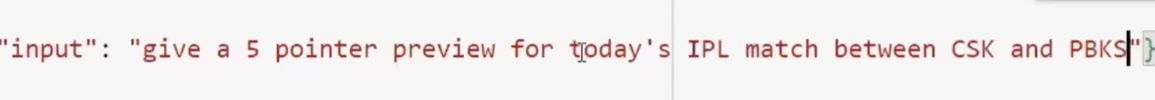

In [38]:
# Invoke
response = agent_executor.invoke({"input": "Give a 5 pointer for today's IPL match between CSK and PBKS"})



> Entering new AgentExecutor chain...
I need to search for the latest update on the IPL match between CSK and PBKS.
Action: duckduckgo_search
Action Input: IPL CSK vs PBKS today match 5 pointerThey played their first match of the season here and scored 243 for 5 in a tone-setting performance, and returned for Qualifier 2, where they ... He made a hundred the last time he batted here in the IPL , against the big boys from CSK , whom he flayed all around the park in the final those two ... Are the wheels coming off? It's all happening in Bengaluru and this game, like so many RCB- CSK classics, is shaping up to be a humdinger. ... PBKS ) will be without the services of New Zealand pacer Lockie Ferguson when they host Kolkata Knight Riders (KKR) in match 31 of Indian Premier ... Simply tap on the stats icon to find a comprehensive overview of the IPL teams, upcoming matches , teams ’ head-to-head records, and other ...I need to find specific information on today's match between CSK and P

In [39]:
response

{'input': "Give a 5 pointer for today's IPL match between CSK and PBKS",
 'output': 'Punjab Kings (PBKS) took a big step forward on their road to the playoffs with a six-wicket final-over win against Chennai Super Kings (CSK) in Match 49 of the IPL 2025.'}

In [40]:
response['output']

'Punjab Kings (PBKS) took a big step forward on their road to the playoffs with a six-wicket final-over win against Chennai Super Kings (CSK) in Match 49 of the IPL 2025.'

# Using Multiple Built-in and Custom Tool

In [77]:
from langchain_classic.agents import create_react_agent, AgentExecutor
from langchain_classic import hub

from langchain.tools import tool

from langchain_community.tools import DuckDuckGoSearchRun

import os
from dotenv import load_dotenv

In [53]:
load_dotenv()

True

In [54]:
OPEN_AI_KEY=os.getenv("OPEN_AI_KEY")
WEATHER_API=os.getenv("WEATHER_API")

In [57]:
# tool creation

In [58]:
search_tool = DuckDuckGoSearchRun()

In [65]:
@tool
def get_weather_data(city: str) -> str:
    """
    This Function fetches the current weather data for a given city
    """

    url = f"https://api.weatherstack.com/current?access_key={WEATHER_API}&query={city}"

    response = requests.get(url)

    return response.json()

    

In [68]:
result = get_weather_data.invoke({"city": "delhi"})

{'request': {'type': 'City',
  'query': 'Delhi, Canada',
  'language': 'en',
  'unit': 'm'},
 'location': {'name': 'Delhi',
  'country': 'Canada',
  'region': 'Ontario',
  'lat': '42.850',
  'lon': '-80.500',
  'timezone_id': 'America/Toronto',
  'localtime': '2025-12-26 14:13',
  'localtime_epoch': 1766758380,
  'utc_offset': '-5.0'},
 'current': {'observation_time': '07:13 PM',
  'temperature': -4,
  'weather_code': 317,
  'weather_icons': ['https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0021_cloudy_with_sleet.png'],
  'weather_descriptions': ['Light sleet'],
  'astro': {'sunrise': '07:51 AM',
   'sunset': '04:54 PM',
   'moonrise': '11:38 AM',
   'moonset': '11:51 PM',
   'moon_phase': 'Waxing Crescent',
   'moon_illumination': 31},
  'air_quality': {'co': '229.837',
   'no2': '12.937',
   'o3': '62',
   'so2': '2.537',
   'pm2_5': '4.737',
   'pm10': '4.937',
   'us-epa-index': '1',
   'gb-defra-index': '1'},
  'wind_speed': 30,
  'wind_degree': 70,
  'wind_dir

In [70]:
# llm creation

In [71]:
llm = ChatOpenAI(
    api_key = OPEN_AI_KEY,
    model="gpt-3.5-turbo",
    base_url="https://openrouter.ai/api/v1",
    verbose=True,
)

In [72]:
# pull the prompt from langchain hub
prompt = hub.pull("hwchase17/react")

In [75]:
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [76]:
# create react agent manually with the pulled prompt

agent = create_react_agent(
    llm=llm,
    tools=[search_tool, get_weather_data],
    prompt=prompt,
)

In [81]:
# create Agent Executor

agent_executor = AgentExecutor(
    agent=agent,
    tools=[search_tool, get_weather_data],
    verbose=True,

)

In [82]:
# invoke
response = agent_executor.invoke({"input": "Find the capital of Madhya Pradesh, then find it's current weather condition"})



> Entering new AgentExecutor chain...
I should search for the capital of Madhya Pradesh first and then get the current weather data for that city.
Action: duckduckgo_search
Action Input: "Capital of Madhya Pradesh"Bho pal (Hindi: Bhōpāl, pronounced [bʱoːpaːlᵊ] ⓘ) is the capital city of the Indian state of Madhya Pradesh and the administrative headquarters of both Bhopal district and Bhopal division. [10] 5 days ago · Madhya Pradesh, state of India that is situated in the heart of the country. It has no coastline and no international frontier. Its physiography is characterized by low hills, extensive plateaus, and river valleys. The capital is Bhopal, in the west-central part of the state. In summary, Bhopal is the capital of Madhya Pradesh—centrally located, historically significant, and vital for administrative functions. Bhopal’s status as capital helps students in exams, general knowledge, and map-based learning. 3 days ago · Bhopal, the capital of Madhya Pradesh , is a fascinatin

In [83]:
response

{'input': "Find the capital of Madhya Pradesh, then find it's current weather condition",
 'output': 'The capital of Madhya Pradesh is Bhopal and the current weather condition in Bhopal is Haze with a temperature of 12°C.'}

In [85]:
response['output']

'The capital of Madhya Pradesh is Bhopal and the current weather condition in Bhopal is Haze with a temperature of 12°C.'